In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from a CSV file
data = pd.read_csv('overspeeding.csv')

In [4]:
data = data.drop('image', axis=1)
data

,carID,speed,Time
0,1,65.29,11:16:24
1,0,37.73,11:16:25
2,2,84.40,11:16:28
3,3,57.08,11:16:31
4,4,36.30,11:16:39
5,5,60.75,11:16:45
6,6,51.19,11:16:47
7,10,51.16,11:16:51
8,9,42.13,11:16:53
9,11,26.45,11:16:54


<AxesSubplot:>

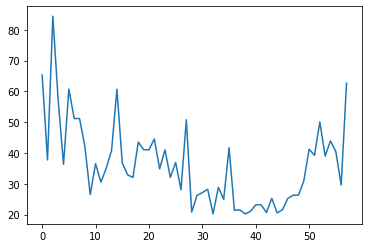

In [5]:
data['speed'].plot()

In [6]:
from arch import arch_model
model = arch_model(data['speed'], vol='GARCH', p=0, o=1, q=2, dist='normal')
model = model.fit()
model.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 1582.877245259747
Iteration:      2,   Func. Count:     15,   Neg. LLF: 233.19064809326602
Iteration:      3,   Func. Count:     22,   Neg. LLF: 228.56642447665834
Iteration:      4,   Func. Count:     28,   Neg. LLF: 228.4967646497148
Iteration:      5,   Func. Count:     34,   Neg. LLF: 228.48218360893006
Iteration:      6,   Func. Count:     40,   Neg. LLF: 228.4358466407651
Iteration:      7,   Func. Count:     46,   Neg. LLF: 228.41450997423073
Iteration:      8,   Func. Count:     52,   Neg. LLF: 228.4129135450473
Iteration:      9,   Func. Count:     58,   Neg. LLF: 228.41199494840657
Iteration:     10,   Func. Count:     64,   Neg. LLF: 228.40934013060158
Iteration:     11,   Func. Count:     70,   Neg. LLF: 228.40591028767878
Iteration:     12,   Func. Count:     76,   Neg. LLF: 228.4006728122187
Iteration:     13,   Func. Count:     82,   Neg. LLF: 228.39680169417562
Iteration:     14,   Func. Count:     88,   Neg. LLF: 22

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -228.395
Distribution:                  Normal   AIC:                           466.790
Method:            Maximum Likelihood   BIC:                           477.092
                                        No. Observations:                   58
Date:                Mon, Apr 10 2023   Df Residuals:                       57
Time:                        22:06:56   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            35.3914      2.324     15.227  2.342e-52 [ 30.836, 39.947]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          5.4742      6.062      0.903      0.367    [ -6.407, 17.356]
gamma[1]       0.0849  7.627e-02      1.113      0.266 [-6.464e-02,  0.234]
beta[1]        0.9063      0.348      2.605  9.191e-03    [  0.224,  1.588]
beta[2]        0.0000      0.326      0.000      1.000    [ -0.638,  0.638]
===========================================================================

Covariance estimator: robust
"""

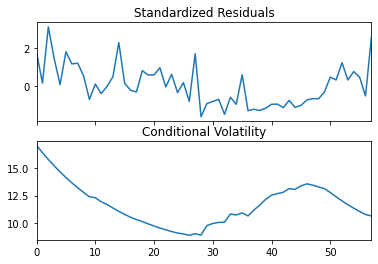

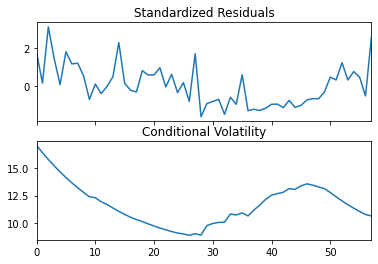

In [7]:
model.plot()

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_true = data['speed']
y_pred = model.conditional_volatility
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

# Compute the mean squared error (MSE)
mse = mean_squared_error(y_true, y_pred)
print('MSE: %.3f' % mse)

# Compute the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print('RMSE: %.3f' % rmse)

# Compute the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print('MAPE: %.3f%%' % mape)

MAE: 24.523
MSE: 769.274
RMSE: 27.736
MAPE: 63.857%


ARIMA MODEL FOR TIME SERIES FORECASTING 

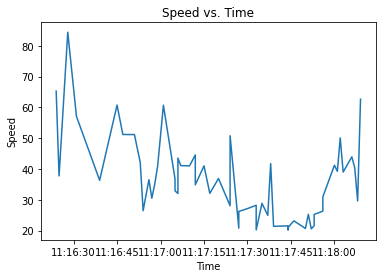

In [9]:
from statsmodels.tsa.arima.model import ARIMA
time_series = pd.Series(data['speed'].values, index=pd.to_datetime(data['Time']))
plt.plot(time_series)
plt.title('Speed vs. Time')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.show()


In [10]:
model = ARIMA(time_series, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())


/Users/lakshan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/lakshan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/lakshan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   58
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -216.184
Date:                Mon, 10 Apr 2023   AIC                            438.367
Time:                        22:07:01   BIC                            444.496
Sample:                             0   HQIC                           440.749
                                 - 58                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2595      0.173     -1.499      0.134      -0.599       0.080
ma.L1         -0.5630      0.178     -3.166      0.002      -0.911      -0.214
sigma2       113.8445     19.019      5.986      0.0

In [11]:
forecast = model_fit.forecast(steps=10)
forecast.index = data.index[0:len(forecast)]
print(forecast)


0    40.930488
1    46.568334
2    45.105563
3    45.485087
4    45.386617
5    45.412166
6    45.405537
7    45.407257
8    45.406811
9    45.406926
Name: predicted_mean, dtype: float64


/Users/lakshan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


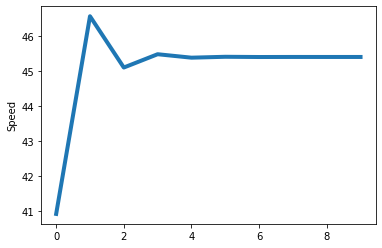

In [12]:
forecast.plot()
plt.setp(plt.gca().lines, linewidth=4)
plt.ylabel('Speed')
plt.show()


### DIFFERENT MODELS TO PREDICT THE TRAFFIC FLOW RATE

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns


dt = pd.read_csv('overspeeding.csv')
dt['Time'] = pd.to_datetime(dt['Time'])
dt['time_diff'] = dt.groupby('carID')['Time'].diff().dt.total_seconds()


In [14]:
dt['distance'] = dt['time_diff'] * dt['speed']
flow_rate = dt.groupby(pd.Grouper(key='Time', freq='T'))['carID'].count()


In [15]:
X = flow_rate[:-1].values.reshape(-1, 1)
y = flow_rate[1:].values


In [16]:
model1 = LinearRegression()
model1.fit(X, y)

LinearRegression()

In [17]:
model1.score(X, y)

1.0

In [18]:
next_flow_rate1 = model1.predict([[flow_rate[-1]]])[0]
print('Predicted traffic flow rate for the next minute: %.2f cars per minute' % next_flow_rate1)


Predicted traffic flow rate for the next minute: 43.64 cars per minute


In [19]:
model2 = GradientBoostingRegressor()
model2.fit(X, y)
next_flow_rate2 = model2.predict([[flow_rate[-1]]])[0]

In [20]:
model2.score(X, y)

0.9999999992944921

In [21]:
print('Predicted traffic flow rate for the next minute: %.2f cars per minute' % next_flow_rate2)


Predicted traffic flow rate for the next minute: 36.00 cars per minute


In [22]:
model3 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model3.fit(X, y)
next_flow_rate3 = model3.predict([[flow_rate[-1]]])[0]
print('Predicted traffic flow rate for the next minute: %.2f cars per minute' % next_flow_rate3)


Predicted traffic flow rate for the next minute: 29.84 cars per minute


In [23]:
model3.score(X, y)

0.768

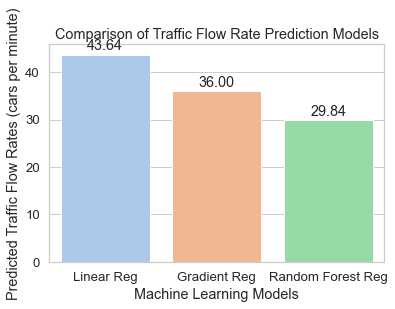

In [24]:
models = ['Linear Reg', 'Gradient Reg', 'Random Forest Reg']
predicted_flow_rates = [next_flow_rate1, next_flow_rate2, next_flow_rate3]
sns.set(style='whitegrid', font_scale=1.2)
sns.set_palette('pastel')
ax = sns.barplot(x=models, y=predicted_flow_rates)
ax.set(xlabel='Machine Learning Models', ylabel='Predicted Traffic Flow Rates (cars per minute)',
       title='Comparison of Traffic Flow Rate Prediction Models')

# Add labels to the bars
for i, v in enumerate(predicted_flow_rates):
    ax.text(i, v+1, '%.2f' % v, ha='center')

plt.show()